<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/4_Big_Data_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spark  SQL**



# Descargando e instalando Sparken colab

In [1]:
# Instalar SDK Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Descargar Spark 3.2.2
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [3]:
# Descomprimir el archivo descargado de Spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [4]:
# Establecer las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [5]:
# Instalar la librería findspark
!pip install -q findspark

In [6]:
# Instalar pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [7]:
### verificar la instalación ###

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

# Transformaciones - funciones drop, sample y randomSplit

In [8]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [11]:
df = spark.read.parquet('./data/datos.parquet')

In [12]:
# drop

df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [13]:
df_util = df.drop('comments_disabled')

In [14]:

df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [15]:
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link')

df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [16]:
#drop no tiene error a pesar de borrar datos que no existen
df_util = df.drop('comments_disabled', 'ratings_disabled', 'thumbnail_link', 'cafe')
df_util.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [17]:

# sample

df_muestra = df.sample(0.8)

In [21]:
num_filas = df.count()
num_filas_muestra = df_muestra.count()

print('El 80% de filas del dataframe original es {}'.format(num_filas - (num_filas*0.2)))
print('El numero de filas del dataframe muestra es {}'.format(num_filas_muestra))


El 80% de filas del dataframe original es 38509.6
El numero de filas del dataframe muestra es 38270


In [22]:
df_muestra = df.sample(fraction=0.8, seed=1234)

In [23]:
df_muestra = df.sample(withReplacement=True, fraction=0.8, seed=1234)

In [24]:
# randomSplit
train, test = df.randomSplit([0.8, 0.2], seed=1234)

In [26]:
train, validation, test = df.randomSplit([0.6, 0.2, 0.2], seed=1234)
train, validation, test = df.randomSplit([0.6, 0.2, 0.2], seed=1234)

In [27]:

train.count()

28808

In [30]:
validation.count()


9698

In [31]:

test.count()

9631

# Trabajo con datos incorrectos o faltantes

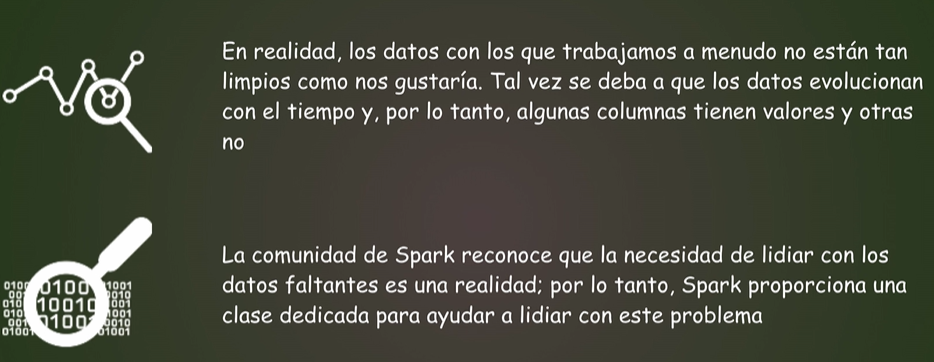

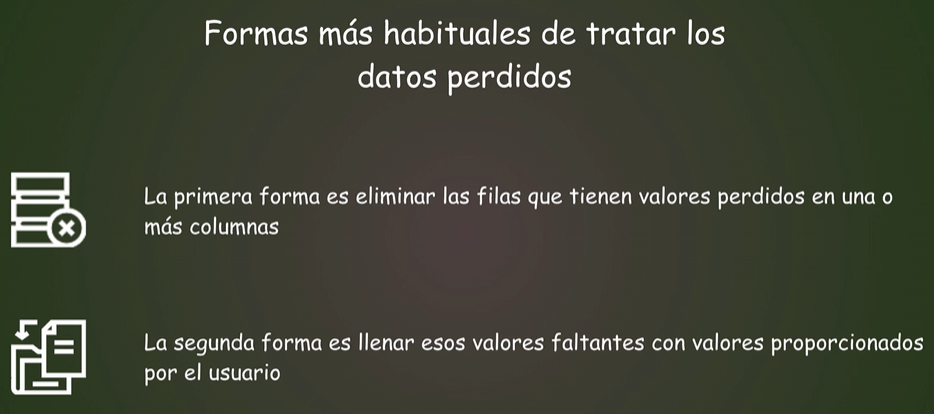

In [32]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [34]:

df = spark.read.parquet('./data/')

In [35]:
df.count()

48137

In [36]:

df.na.drop().count()

40379

In [37]:
df.na.drop('any').count()

40379

In [38]:
df.dropna().count()

40379

In [39]:
df.na.drop(subset=['views']).count()

40949

In [40]:

df.na.drop(subset=['views', 'dislikes']).count()

40949

In [41]:
from pyspark.sql.functions import col

df.orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
+-----+-----+--------+
only showing top 20 rows



In [42]:
df.fillna(0).orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
+-----+-----+--------+
only showing top 20 rows



In [43]:
df.fillna(0, subset=['likes', 'dislikes']).orderBy(col('views')).select(col('views'), col('likes'), col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
+-----+-----+--------+
only showing top 20 rows



# Acciones sobre un dataframe en Spark SQL

In [44]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [45]:
df = spark.read.parquet('./data/')

In [46]:
# show
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [48]:
df.show(5)

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [49]:
df.show(5, truncate=False)

+-----------+-------------+--------------------------------------------------------------+---------------------+-----------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [50]:
# take
df.take(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [51]:
# head

df.head(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [52]:
# collect

df.select('likes').collect()

[Row(likes=57527),
 Row(likes=97185),
 Row(likes=146033),
 Row(likes=10172),
 Row(likes=132235),
 Row(likes=9763),
 Row(likes=15993),
 Row(likes=23663),
 Row(likes=3543),
 Row(likes=12654),
 Row(likes=655),
 Row(likes=1576),
 Row(likes=114188),
 Row(likes=7848),
 Row(likes=7473),
 Row(likes=9419),
 Row(likes=8011),
 Row(likes=5398),
 Row(likes=11963),
 Row(likes=8421),
 Row(likes=9586),
 Row(likes=3585),
 Row(likes=11758),
 Row(likes=1707),
 Row(likes=4884),
 Row(likes=8676),
 Row(likes=4687),
 Row(likes=9033),
 Row(likes=156),
 Row(likes=715),
 Row(likes=4035),
 Row(likes=119),
 Row(likes=787419),
 Row(likes=3781),
 Row(likes=1661),
 Row(likes=2486),
 Row(likes=7515),
 Row(likes=1318),
 Row(likes=38397),
 Row(likes=6927),
 Row(likes=5389),
 Row(likes=308),
 Row(likes=7),
 Row(likes=15186),
 Row(likes=4451),
 Row(likes=33505),
 Row(likes=3417),
 Row(likes=2017),
 Row(likes=35),
 Row(likes=45406),
 Row(likes=99086),
 Row(likes=205),
 Row(likes=15397),
 Row(likes=None),
 Row(likes=None),

In [54]:
df1 = spark.read.text('./data/data1.txt')
df1.show()

+--------------------+
|               value|
+--------------------+
|           Entrada\t|
|Alice;Tarjeta de ...|
|Alice;Tarjeta de ...|
|Alice;Bizum;200\t...|
|Bob;Tarjeta de cr...|
|      Luis;Bizum;300|
+--------------------+



In [55]:
df1.show(truncate=False)

+------------------------------+
|value                         |
+------------------------------+
|Entrada\t                     |
|Alice;Tarjeta de credito;100\t|
|Alice;Tarjeta de credito;150\t|
|Alice;Bizum;200\tLuis;0       |
|Bob;Tarjeta de credito;201\t  |
|Luis;Bizum;300                |
+------------------------------+



# Escritura de DataFrames

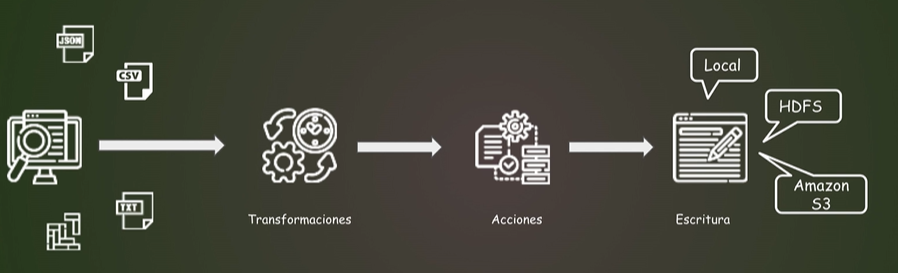

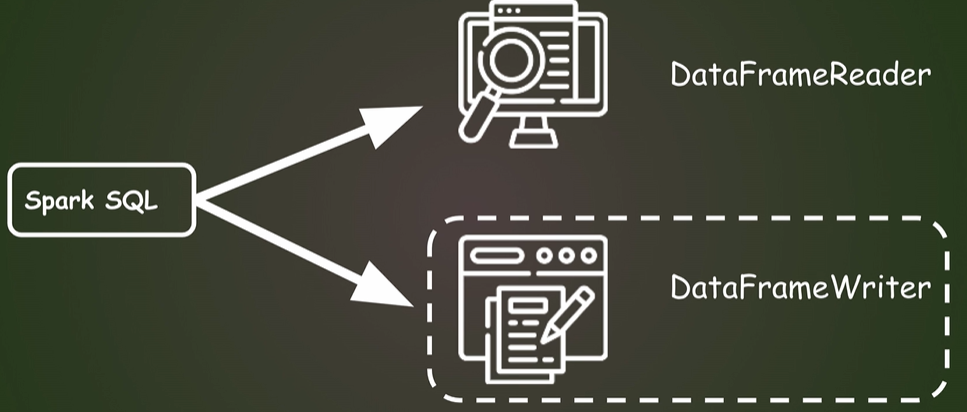

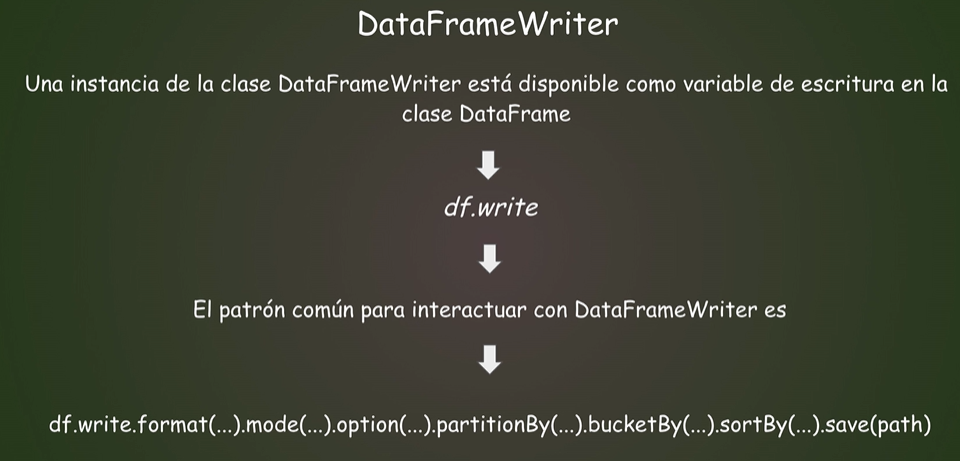

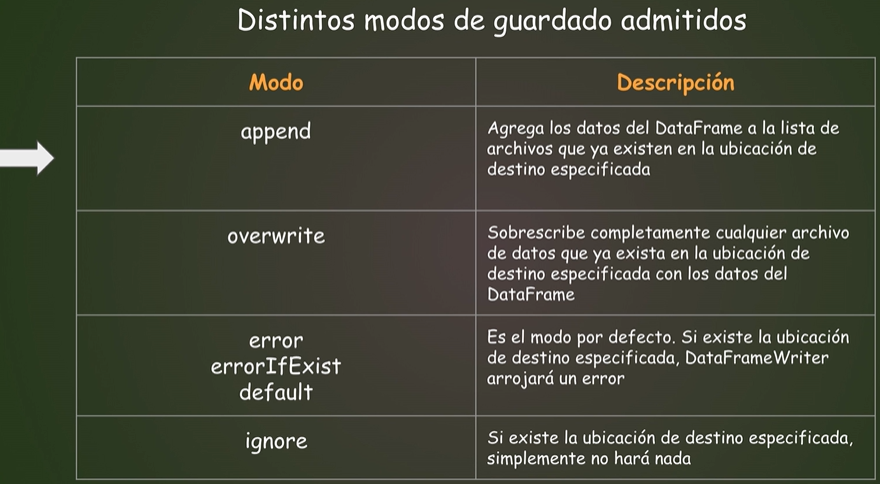

In [56]:

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [59]:
df = spark.read.parquet('./data/datos.parquet')

In [60]:
df1 = df.repartition(2)

In [64]:
df1.write.format('csv').option('sep', '|').save('./output/csv')

In [66]:
# solo una particion
df1.coalesce(1).write.format('csv').option('sep', '|').save('./output/csv2')

In [67]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [68]:
df.select('comments_disabled').distinct().show()

+-----------------+
|comments_disabled|
+-----------------+
|            False|
|             null|
| sports and more.|
|          Wiz Kid|
|             True|
|         farfalle|
+-----------------+



In [69]:
from pyspark.sql.functions import col

df_limpio = df.filter(col('comments_disabled').isin('True', 'False'))

In [70]:
df_limpio.write.partitionBy('comments_disabled').parquet('./output/parquet')

# Persistencia de DataFrames

In [71]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [72]:
df = spark.createDataFrame([(1, 'a'), (2, 'b'), (3, 'c')], ['id', 'valor'])

df.show()

+---+-----+
| id|valor|
+---+-----+
|  1|    a|
|  2|    b|
|  3|    c|
+---+-----+



In [73]:
df.persist()

DataFrame[id: bigint, valor: string]

In [74]:
df.unpersist()

DataFrame[id: bigint, valor: string]

In [75]:
df.cache()

DataFrame[id: bigint, valor: string]

In [76]:
from pyspark.storagelevel import StorageLevel

df.persist(StorageLevel.DISK_ONLY)

DataFrame[id: bigint, valor: string]

In [77]:
df.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[id: bigint, valor: string]